# The Validity of the Revenge Game Narrative
#### Casey Winkle
[GitHub Link](https://github.com/KcWink/CMPS3160/blob/main/Project_Cwinkle.ipynb)
### Project Goals

The aim of my project is to investigate the validity of the "revenge game" narrative in sports.  Specifically I will be using the NBA to analyze this idea.  I will be using NBA box scores from 1997-2024 and looking at players who are playing their previous team.  There are still a lot of specifics to be worked out as to how many games will be used, for example if a player plays the team they played for the previous year should I just use the first instance of every matchup that year.  Part of the project may be analyzing if there is a disparity there. Then based on the outcomes found based on if there are tangible statistical changes, use that to predict future matchup success of players in revenge games.

## Collaboration Plan
I am a grad student so it will just be me!

In [40]:
import pandas as pd
import numpy as np
stats_df = pd.read_csv('/traditional.csv')

## Table 1

This table is being used from https://www.kaggle.com/datasets/szymonjwiak/nba-traditional?resource=download

This includes all player stats between in regular season, play-in, and playoff games between 1997-2024


In [14]:
stats_df.head(14)

,gameid,date,type,playerid,player,team,home,away,MIN,PTS,...,DREB,REB,AST,STL,BLK,TOV,PF,+/-,win,season
0,29600001,1996-11-01,regular,677,Eric Williams,BOS,BOS,CHI,25,14,...,1,3,1,0,0,1,4,1,0,1997
1,29600001,1996-11-01,regular,442,Pervis Ellison,BOS,BOS,CHI,31,7,...,6,10,0,3,2,3,5,-8,0,1997
2,29600001,1996-11-01,regular,783,Frank Brickowski,BOS,BOS,CHI,19,3,...,1,2,4,2,0,5,5,-7,0,1997
3,29600001,1996-11-01,regular,344,Dana Barros,BOS,BOS,CHI,38,24,...,1,1,6,1,0,3,2,-4,0,1997
4,29600001,1996-11-01,regular,133,David Wesley,BOS,BOS,CHI,41,19,...,2,3,6,2,0,1,4,-22,0,1997
5,29600001,1996-11-01,regular,103,Todd Day,BOS,BOS,CHI,20,9,...,2,4,0,1,0,0,5,5,0,1997
6,29600001,1996-11-01,regular,296,Rick Fox,BOS,BOS,CHI,37,10,...,6,9,3,1,0,3,2,-17,0,1997
7,29600001,1996-11-01,regular,952,Antoine Walker,BOS,BOS,CHI,27,12,...,2,3,0,0,0,1,4,3,0,1997
8,29600001,1996-11-01,regular,1136,Brett Szabo,BOS,BOS,CHI,2,0,...,1,1,0,0,0,1,2,4,0,1997
9,29600001,1996-11-01,regular,893,Michael Jordan,CHI,BOS,CHI,43,30,...,3,4,3,0,0,1,2,11,1,1997


Clean table

*   Remove all non regular season games
*   Remove all players who have only played for 1 team

*   Set playerID as index




In [41]:
# Before any changes
# How many rows?
print(f"Number of rows before cleaning: {len(stats_df)}")

# Calculate average points scored
avg_score = stats_df['PTS'].mean()

# Print the result
print(f"Average score of players: {avg_score}")

# Remove all non-regular season games
stats_df = stats_df[stats_df['type'] == 'regular']

# Group data by player and get the number of unique teams
team_counts = stats_df.groupby('player')['team'].nunique()

# Filter out players who have played for only one team
players_to_keep = team_counts[team_counts > 1].index

# Filter the original DataFrame to keep only these players
stats_df = stats_df[stats_df['player'].isin(players_to_keep)]

# Set playerID to index
stats_df = stats_df.set_index('playerid')
stats_df.head(14)

Number of rows before cleaning: 730593
Average score of players: 9.812330531499754


,gameid,date,type,player,team,home,away,MIN,PTS,FGM,...,DREB,REB,AST,STL,BLK,TOV,PF,+/-,win,season
playerid,,,,,,,,,,,,,,,,,,,,,
677,29600001,1996-11-01,regular,Eric Williams,BOS,BOS,CHI,25,14,6,...,1,3,1,0,0,1,4,1,0,1997
442,29600001,1996-11-01,regular,Pervis Ellison,BOS,BOS,CHI,31,7,2,...,6,10,0,3,2,3,5,-8,0,1997
344,29600001,1996-11-01,regular,Dana Barros,BOS,BOS,CHI,38,24,9,...,1,1,6,1,0,3,2,-4,0,1997
133,29600001,1996-11-01,regular,David Wesley,BOS,BOS,CHI,41,19,8,...,2,3,6,2,0,1,4,-22,0,1997
103,29600001,1996-11-01,regular,Todd Day,BOS,BOS,CHI,20,9,3,...,2,4,0,1,0,0,5,5,0,1997
296,29600001,1996-11-01,regular,Rick Fox,BOS,BOS,CHI,37,10,4,...,6,9,3,1,0,3,2,-17,0,1997
952,29600001,1996-11-01,regular,Antoine Walker,BOS,BOS,CHI,27,12,5,...,2,3,0,0,0,1,4,3,0,1997
893,29600001,1996-11-01,regular,Michael Jordan,CHI,BOS,CHI,43,30,10,...,3,4,3,0,0,1,2,11,1,1997
937,29600001,1996-11-01,regular,Scottie Pippen,CHI,BOS,CHI,40,18,8,...,7,8,6,2,0,5,4,28,1,1997


Interesting facts


1.   There are 730593 rows, meaning 730593 instances players with stats for a game
2.   There are 1418 instances where a player switched teams the faced off against their previous team in the next year
3.   The average points scored in games by a player was 9.81
4.   The average points scored in the 1418 instances of revenge games was 10.93



One thing to note about the difference in average points versus average points in a revenge game is that these are not from the same player pool, and there could just be a correlation with higher points and players who have changed teams.  Players who have changed teams are much more likely to have signed another contract (trades can happen but will be in the minority).  Players that have signed a second contract have been deemed more NBA worthy than those who have only ever signed 1 contract.  Those that have only signed 1 contract will mostly be in 1 team boat, and therefore none of their points would have been counted in the revenge game average.




In [17]:
# Create a DataFrame to find revenge games
player_team_year = stats_df[['player', 'team', 'season']]

# Group by player and year to get the teams played for each year
grouped = player_team_year.groupby(['player', 'season'])['team'].unique().reset_index()

# Shift the 'team' column to compare with the previous year's team
grouped['previous_team'] = grouped.groupby('player')['team'].shift(1)

# Filter out the first year for each player (no previous team)
grouped = grouped.dropna(subset=['previous_team'])

# Check if the previous team is in the current year's opponents
grouped['played_previous_team'] = grouped.apply(lambda row: any(team in row['previous_team'] for team in row['team']), axis=1)

# Filter for players who played their previous team
revenge_players = grouped[grouped['played_previous_team']]

# Count the number of unique players
num_revenge_players = revenge_players['player'].nunique()

# Print the result
print(f"Number of players who changed teams and played their previous team the next year: {num_revenge_players}")

Number of players who changed teams and played their previous team the next year: 1418


In [38]:
# Merge revenge_players with stats_df
revenge_games = pd.merge(revenge_players, stats_df, on=['player', 'season'], how='left')

# Calculate average points in revenge games
avg_score1 = revenge_games['PTS'].mean()

# Print the result
print(f"Average score of players in revenge games: {avg_score1}")

Average score of players in revenge games: 10.934163226010016


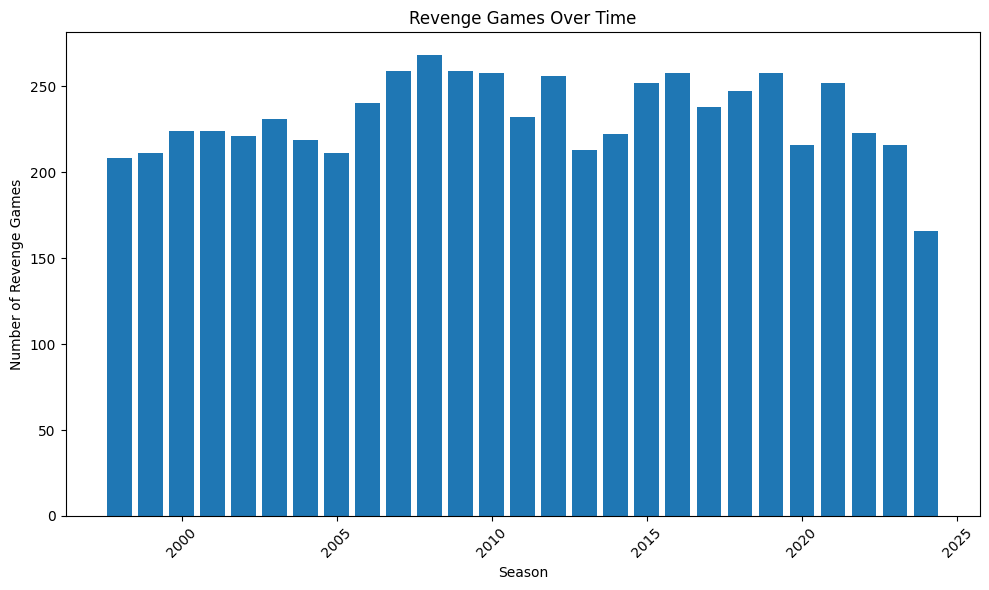

In [42]:
import matplotlib.pyplot as plt

# Group by season and count revenge games
revenge_games_per_season = revenge_players.groupby('season')['player'].count().reset_index()

# Create plot
plt.figure(figsize=(10, 6))
plt.bar(revenge_games_per_season['season'], revenge_games_per_season['player'])
plt.xlabel("Season")
plt.ylabel("Number of Revenge Games")
plt.title("Revenge Games Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This graph shows a pretty similar number of revenge games per season, which seems to hover above ~200 games per season.  I was curious to see if this value increased over time suggesting that players were switching teams more often, however that does not appear to be the case.